# Segment Anything for Fast Developing Embryos ([colab](https://colab.research.google.com/drive/1N4wv9jljtEZ_w-f92iOLXCdkD-KJlsJH?usp=sharing))
Segmentation is a fundamental task in medical imaging analysis. Deep learning-based models have shown great promise in medical image segmentation due to their ability to learn intricate image features and deliver accurate segmentation results across a diverse range of tasks. Recently, the Segmentation Anything Model (SAM) has shown remarkable versatility and performance in natural image segmentation. However, their application to medical image segmentation has been challenging due to the substantial domain gap. In this tutorial, we will introduce how to adapt the SAM's success to medical image segmentation.

## Overview

0. Installation
1. 方法介绍
2. 加载模型
3. 预处理 and run inference in an interactive way
4. 粗分割for boxprompt



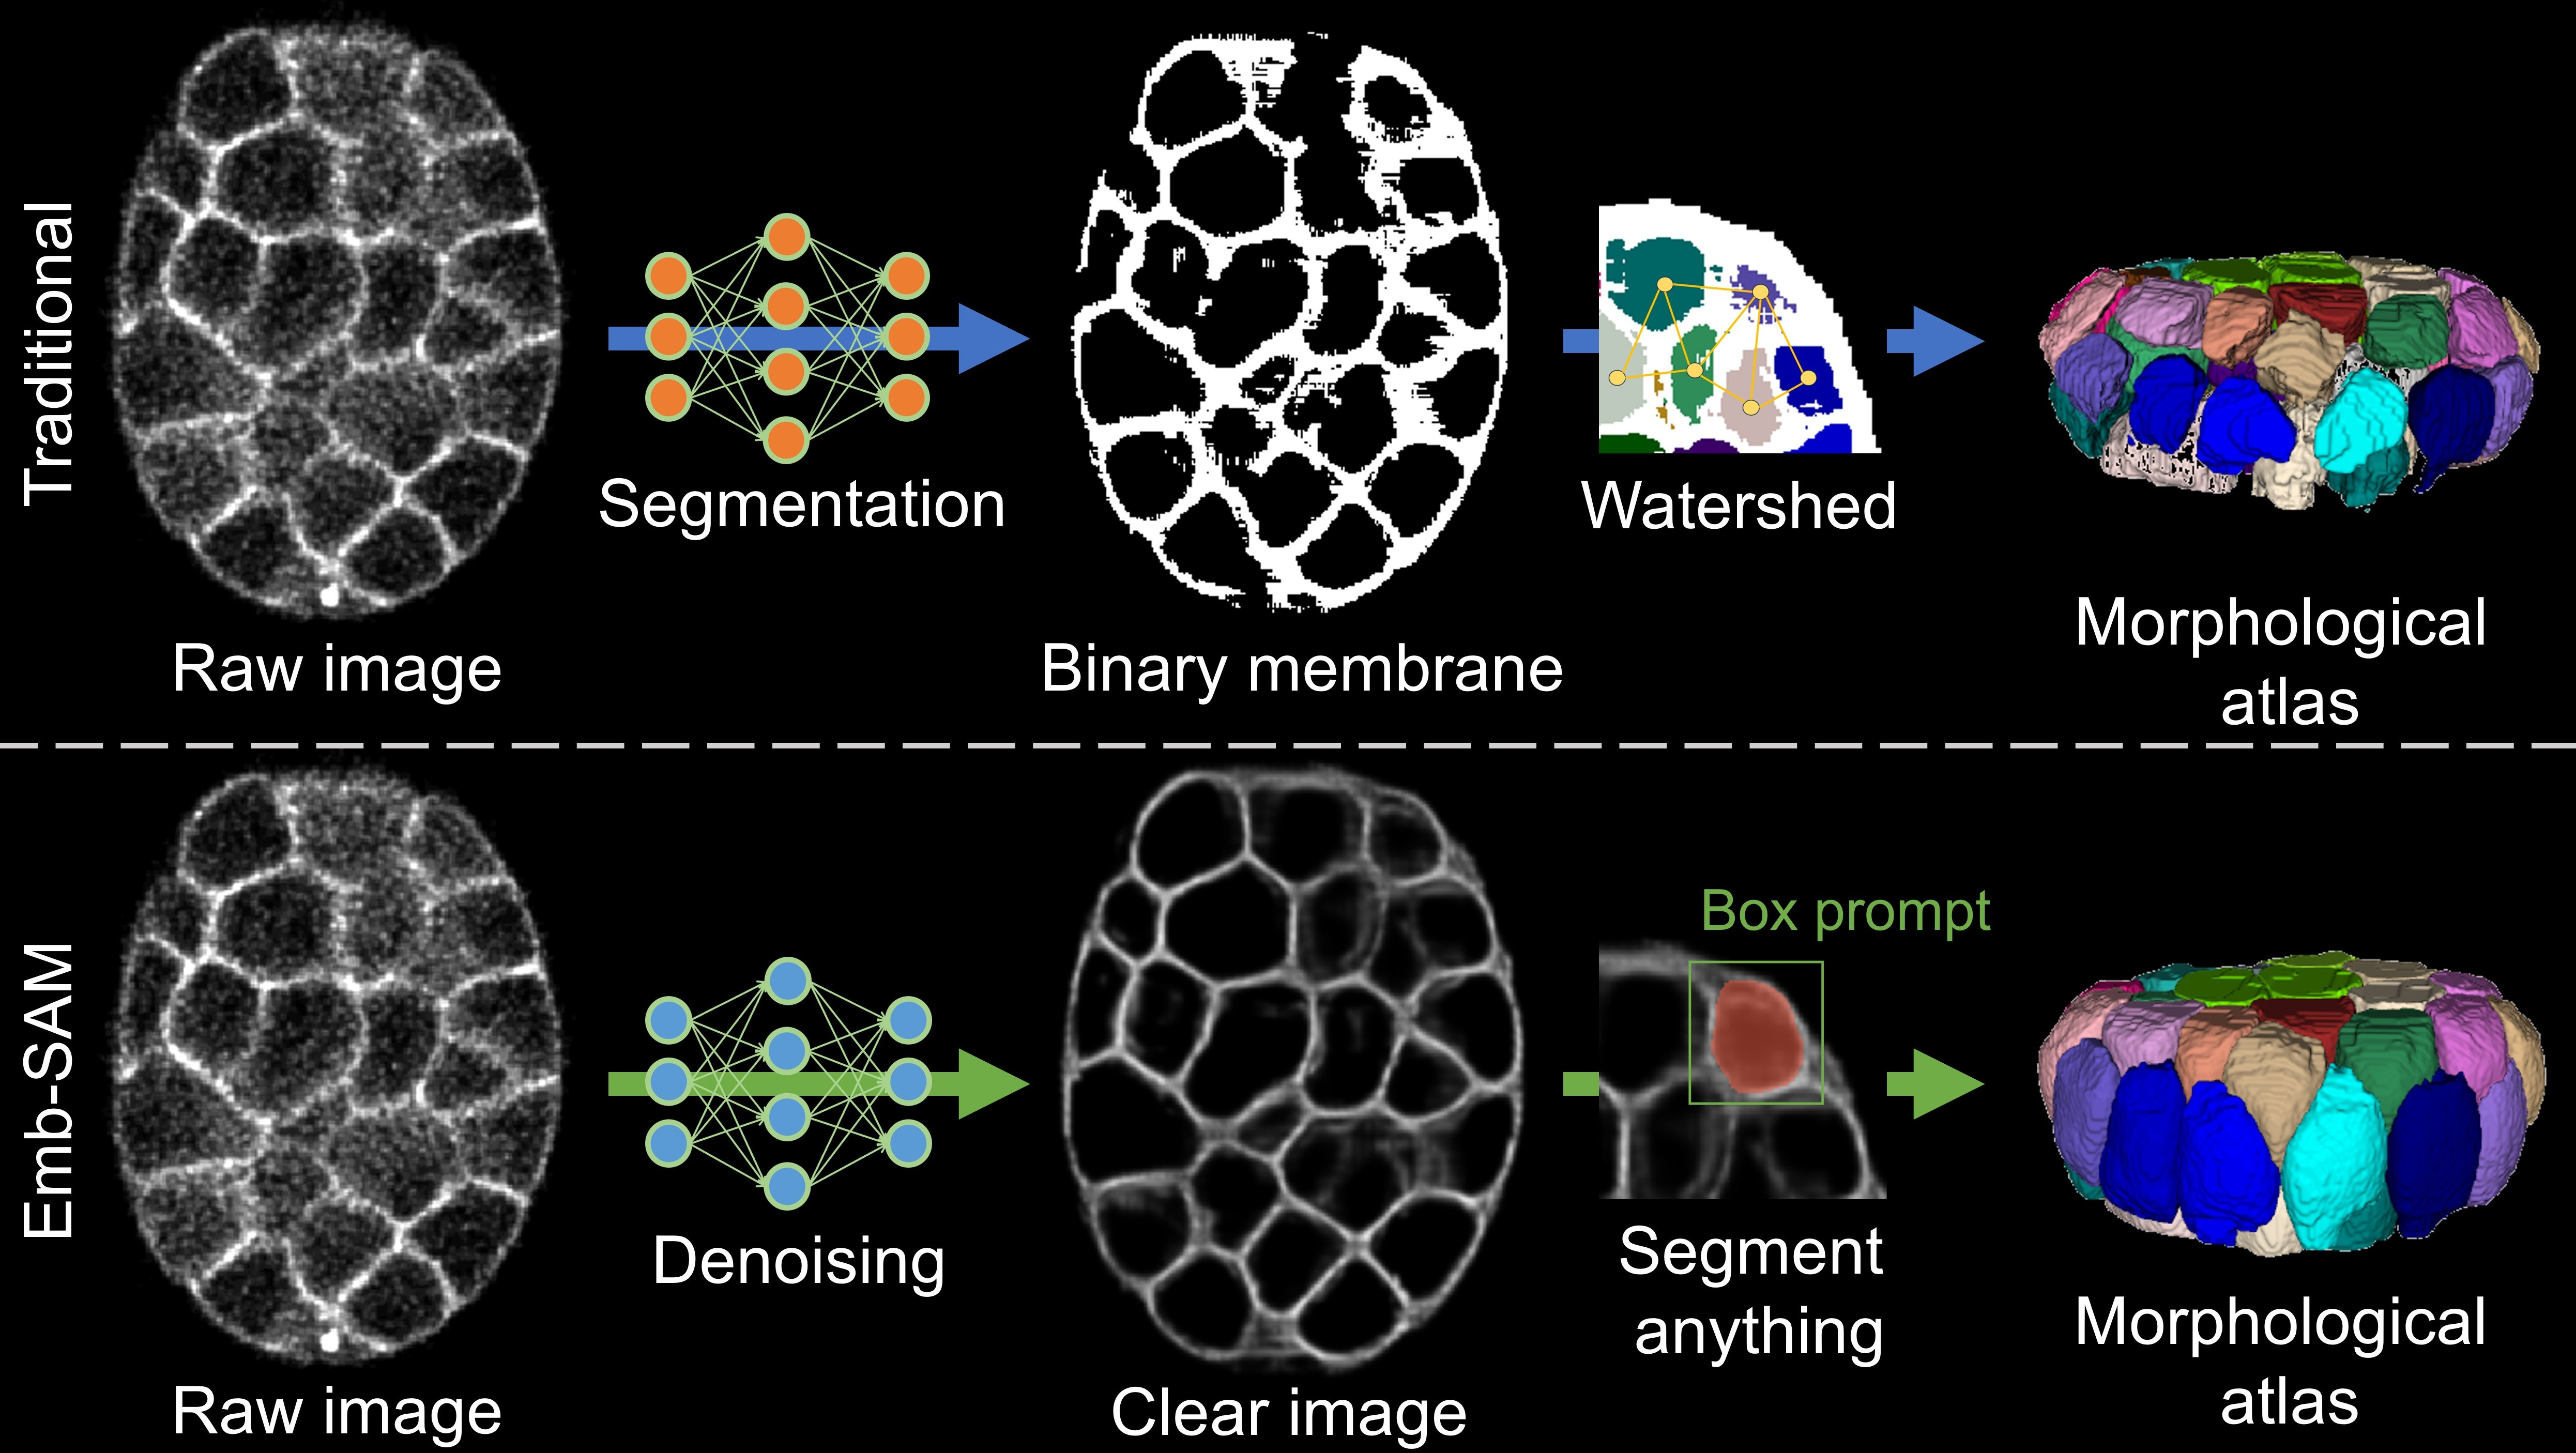

In [1]:
import warnings
warnings.filterwarnings("ignore")
from EmbSAM import *
#from EmbSAM_demo import *
config_file = './confs/running_Emb1.txt'
nii_path = './nii_folder_1_test1/'
opdir = './output_folder_1_test1/'
params = init_config(config_file, nii_path, opdir)

nii_path: ./nii_folder_1_test1/
opdir: ./output_folder_1_test1/
rootname: Emb1_
CD_file: ./confs/Emb1_CellTracing.csv
time_point: [20]
ori_shape: (512, 712, 68)
raw_path: ./data/Emb1_raw
data_shape: (256, 356, 160)
scale: 255.0


./nii_folder_1_test1/Emb1_020.nii.gz
File: Emb1_020.nii.gz - Shape: (256, 356, 160)
processing...
-------------------------denoising-------------------------
OrderedDict([('manual_seed', 10), ('lr_G', 0.0004), ('weight_decay_G', 0), ('beta1', 0.9), ('beta2', 0.99), ('lr_scheme', 'MultiStepLR'), ('warmup_iter', -1), ('lr_steps_rel', [0.15, 0.3, 0.45, 0.6]), ('lr_gamma', 0.5), ('weight_l1', 0), ('weight_fl', 1), ('niter', 10000), ('val_freq', 100), ('lr_steps', [1500, 3000, 4500, 6000])])


256it [00:14, 17.55it/s]


OrderedDict([('manual_seed', 10), ('lr_G', 0.0004), ('weight_decay_G', 0), ('beta1', 0.9), ('beta2', 0.99), ('lr_scheme', 'MultiStepLR'), ('warmup_iter', -1), ('lr_steps_rel', [0.15, 0.3, 0.45, 0.6]), ('lr_gamma', 0.5), ('weight_l1', 0), ('weight_fl', 1), ('niter', 10000), ('val_freq', 100), ('lr_steps', [1500, 3000, 4500, 6000])])


356it [00:20, 17.56it/s]


OrderedDict([('manual_seed', 10), ('lr_G', 0.0004), ('weight_decay_G', 0), ('beta1', 0.9), ('beta2', 0.99), ('lr_scheme', 'MultiStepLR'), ('warmup_iter', -1), ('lr_steps_rel', [0.15, 0.3, 0.45, 0.6]), ('lr_gamma', 0.5), ('weight_l1', 0), ('weight_fl', 1), ('niter', 10000), ('val_freq', 100), ('lr_steps', [1500, 3000, 4500, 6000])])


160it [00:09, 17.56it/s]


(356, 160, 256)
(256, 356, 160)
Transposed NIfTI image saved and original file overwritten at: ./output_folder_1_test1/Emb1_020_X.nii.gz
Done
(256, 160, 356)
(256, 356, 160)
Transposed NIfTI image saved and original file overwritten at: ./output_folder_1_test1/Emb1_020_Y.nii.gz
Done
(256, 356, 160)
(256, 356, 160)
Transposed NIfTI image saved and original file overwritten at: ./output_folder_1_test1/Emb1_020_Z.nii.gz
Done
Fused image saved at: ./output_folder_1_test1/Emb1_020.nii.gz
Deleted ./output_folder_1_test1/Emb1_020_X.nii.gz
Deleted ./output_folder_1_test1/Emb1_020_Y.nii.gz
Deleted ./output_folder_1_test1/Emb1_020_Z.nii.gz


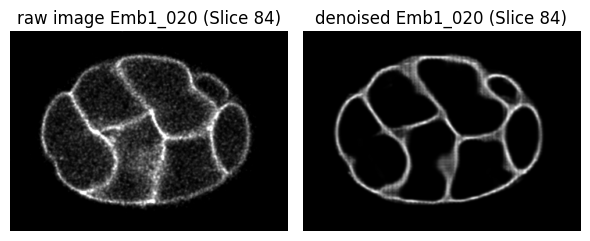

In [2]:
denoise_pipeline(params['raw_path'], params['nii_path'], params['rootname'], params['data_shape'], 
                 params['time_point'], params['scale'], params['output_X'], params['output_Y'], 
                 params['output_Z'], params['opdir'], params['result_X'], params['result_Y'], params['result_Z'],
                 params['size_X'], params['size_Y'], params['size_Z'])

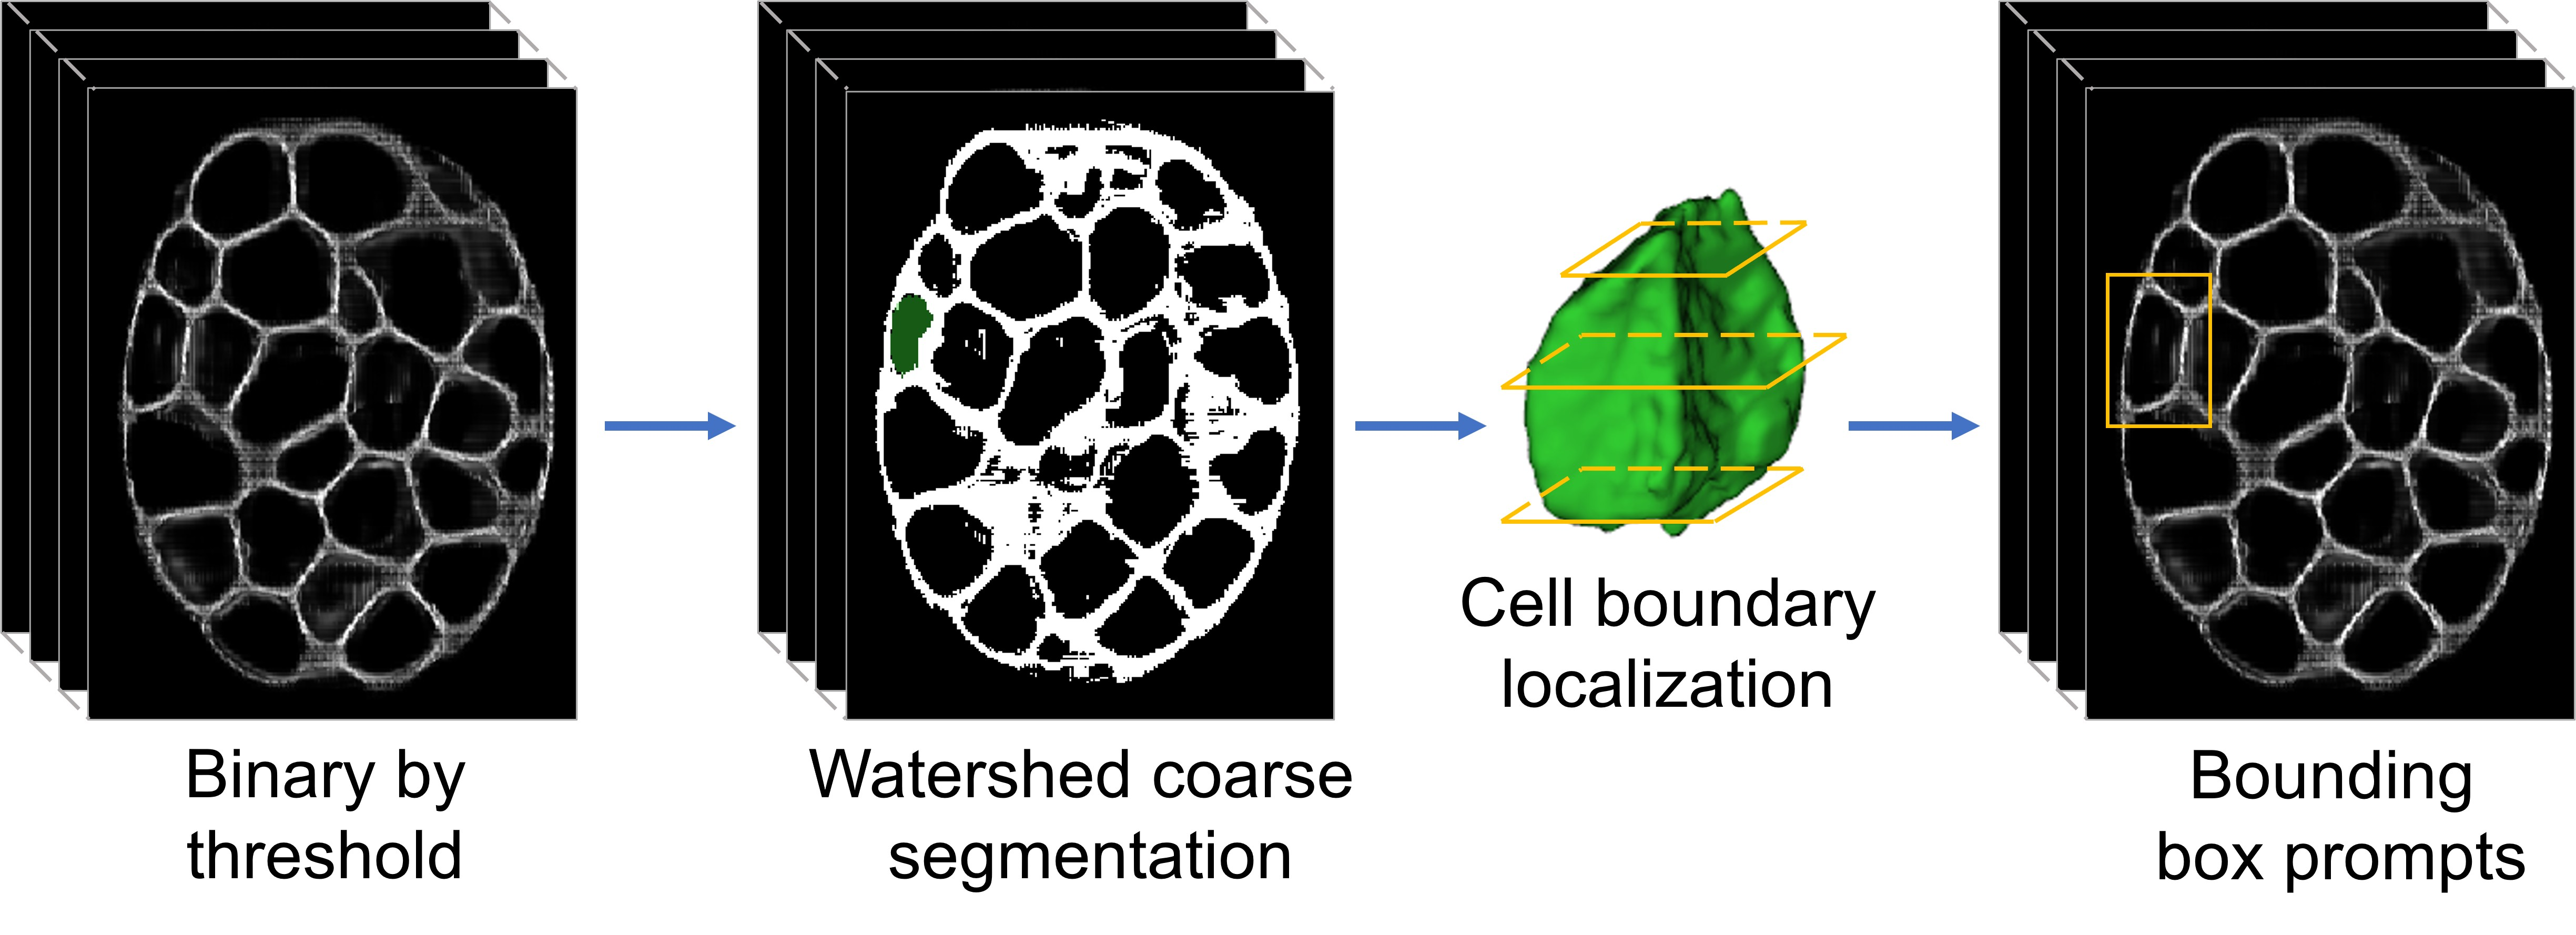

In [3]:
boundary_localization_pipeline(params['opdir'], params['rootname'], params['time_point'], 
                               params['CD_file'], params['ratio'], params['ori_shape'])

processing Emb1_020.nii.gz...


toseg membrane --> cell, all cpu process is 32, we created 1:   0%|           | 0/1 [00:00<?, ?it/s]

-------------------------watershed coarse seg-------------------------


toseg membrane --> cell, all cpu process is 32, we created 1: 100%|███| 1/1 [00:22<00:00, 22.76s/it]


done
-----------------------Cell boundary localization-----------------------
ABala ABalp 20 Yes
Renamed ./output_folder_1_test1/matrix\Emb1_020\Emb1_020_ABala.nii.gz to ./output_folder_1_test1/matrix\Emb1_020\Emb1_020_ABal.nii.gz
ABara ABarp 20 Yes
Renamed ./output_folder_1_test1/matrix\Emb1_020\Emb1_020_ABara.nii.gz to ./output_folder_1_test1/matrix\Emb1_020\Emb1_020_ABar.nii.gz
ABpla ABplp 20 Yes
Renamed ./output_folder_1_test1/matrix\Emb1_020\Emb1_020_ABpla.nii.gz to ./output_folder_1_test1/matrix\Emb1_020\Emb1_020_ABpl.nii.gz
ABpra ABprp 20 Yes
Renamed ./output_folder_1_test1/matrix\Emb1_020\Emb1_020_ABpra.nii.gz to ./output_folder_1_test1/matrix\Emb1_020\Emb1_020_ABpr.nii.gz
4
Processing file: ./output_folder_1_test1/denoised/Emb1_020.nii.gz
Saved file: ./output_folder_1_test1/denoised2/Emb1_020.nii.gz


In [4]:
sam_checkpoint = "./model_parameters/sam_vit_b_01ec64.pth"
model_type = "vit_b"
device = "cuda"
predictor=load_model(sam_checkpoint, model_type, device)
segment_anything(params['opdir'], params['data_shape'], params['raw_path'], params['rootname'], predictor)

Processing subfolder: ./output_folder_1_test1/matrix/Emb1_020
./output_folder_1_test1/matrix/Emb1_020\Emb1_020_ABal.nii.gz done
./output_folder_1_test1/matrix/Emb1_020\Emb1_020_ABar.nii.gz done
./output_folder_1_test1/matrix/Emb1_020\Emb1_020_ABpl.nii.gz done
./output_folder_1_test1/matrix/Emb1_020\Emb1_020_ABpr.nii.gz done
./output_folder_1_test1/matrix/Emb1_020\Emb1_020_C.nii.gz done
./output_folder_1_test1/matrix/Emb1_020\Emb1_020_E.nii.gz done
./output_folder_1_test1/matrix/Emb1_020\Emb1_020_MS.nii.gz done
./output_folder_1_test1/matrix/Emb1_020\Emb1_020_P3.nii.gz done
done
all works done, please check the result in ./output_folder_1_test1/result, thanks


In [8]:
print(f"All tasks have been completed successfully!\nPlease check the Unprocessed 3D image volume at {nii_path}\nand the segmentation results in {params['opdir']}result.\nThank you!")

All tasks have been completed successfully!
Please check the Unprocessed 3D image volume at ./nii_folder_1_test1/
and the segmentation results in ./output_folder_1_test1/result.
Thank you!
